* Radif Ramadan

* Data Science / JCSDOL-014

* Modul 3 - Day 30

---
---

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_csv('data.csv')
df['purchase_time'] = pd.to_datetime(df['purchase_time'])
df

,receipt_id,receipts_item_id,purchase_time,category,sub_category,format,unit_price,discount,quantity
0,9622257,32369294,2018-07-22 21:19:00,Rice,Rice,supermarket,"128,000",0,1
1,9446359,31885876,2018-07-15 16:17:00,Rice,Rice,minimarket,"102,750",0,1
2,9470290,31930241,2018-07-15 12:12:00,Rice,Rice,supermarket,"64,000",0,3
3,9643416,32418582,2018-07-24 08:27:00,Rice,Rice,minimarket,"65,000",0,1
4,9692093,32561236,2018-07-26 11:28:00,Rice,Rice,supermarket,"124,500",0,1
...,...,...,...,...,...,...,...,...,...
71995,5909305,17998610,2017-12-27 09:20:00,Sugar/Flavored Syrup,Sugar,minimarket,"25,000",0,1
71996,5736299,17432379,2017-12-13 19:52:00,Sugar/Flavored Syrup,Sugar,minimarket,"12,500",0,1
71997,5901144,18263665,2017-12-27 08:03:00,Sugar/Flavored Syrup,Sugar,minimarket,"12,500",0,1
71998,5660630,17222218,2017-12-07 12:29:00,Sugar/Flavored Syrup,Sugar,hypermarket,"12,500",0,3


### **2. Hitung Jumlah transaksi di Hypermarket pada tahun 2018 untuk masing - masing sub category**

In [66]:
df[(df.purchase_time.dt.year == 2018) & (df.format == 'supermarket')] \
                    .groupby('sub_category') \
                    .size() \
                    .rename('transaction_hypermarket') \
                    .reset_index()

,sub_category,transaction_hypermarket
0,Detergent,6870
1,Rice,2902
2,Sugar,5118


### **3. Di bulan apa dan tahun berapa penjualan (Total payment) di supermarket mencapai jumlah tertinggi**

In [72]:
pd.options.display.float_format = '{:,.0f}'.format

df['total_payment'] = (df.unit_price - df.discount) * df.quantity
df['year_month'] = df['purchase_time'].dt.to_period('M')

total_payment_my = df[df.format == 'supermarket'] \
                    .groupby('year_month')['total_payment'] \
                    .sum() \
                    .reset_index()

total_payment_my['year_month'] = total_payment_my['year_month'].dt.to_timestamp()

display(total_payment_my)

max_period = total_payment_my.loc[total_payment_my['total_payment'].idxmax(), 'year_month']
max_payment = total_payment_my['total_payment'].max()

max_m, max_y = max_period.month, max_period.year

print(f'\nPenjualan tertinggi sebesar: {max_payment:,.0f} pada bulan {max_m} tahun {max_y}.')


,year_month,total_payment
0,2017-10-01,"61,069,110"
1,2017-11-01,"60,466,410"
2,2017-12-01,"60,602,799"
3,2018-01-01,"57,792,547"
4,2018-02-01,"59,999,703"
5,2018-03-01,"62,179,204"
6,2018-04-01,"58,338,692"
7,2018-05-01,"65,008,429"
8,2018-06-01,"56,032,780"
9,2018-07-01,"47,627,438"



Penjualan tertinggi sebesar: 65,008,429 pada bulan 5 tahun 2018.


### **4. Produk dari Sub kategori mana yg menyumbang transaksi/penjualan tertinggi di No 2 (Bulan dan Tahun)**

In [ ]:
total_payment_sub = pd.pivot_table(data = df[df.format == 'supermarket'],
                                   values = 'total_payment',
                                   index = ['sub_category'],
                                   aggfunc = 'sum').sort_values(by = 'total_payment')
display(total_payment_sub)
second_sales_sub = total_payment_sub.iloc[1:-1]

print(f'Produk sub kategori penyumbang penjualan tertinggi kedua adalah {second_sales_sub.index.values[0]}')

,total_payment
sub_category,
Sugar,"150,422,454"
Detergent,"180,969,298"
Rice,"357,466,035"


Produk sub kategori penyumbang penjualan tertinggi kedua adalah Detergent


### **5. Produk dari sub kategori apa dan hari apa yg memiliki quantity tertinggi di tahun 2017 dan di hypermarket**

In [ ]:
df['day_name'] = df.purchase_time.dt.day_name()
df_2017_hypermarket = df[(df.purchase_time.dt.year == 2017) & (df.format == 'supermarket')]
df_2017_hypermarket

day_sub_category = pd.pivot_table(data = df,
                                  values = 'quantity',
                                  index = ['sub_category', 'day_name'],
                                  aggfunc = 'sum')
display(day_sub_category)

best_sub, best_sales_day = day_sub_category.idxmax().values[0]
print(f'Produk sub kategori dengan Quantity tertinggi adalah {best_sub} dan pada hari {best_sales_day}')

quantity
sub_category day_name           
Detergent    Friday         8216
             Monday         5845
             Saturday       8626
             Sunday         8751
             Thursday       5923
             Tuesday        6193
             Wednesday      6106
Rice         Friday         2273
             Monday         2037
             Saturday       2581
             Sunday         3009
             Thursday       2068
             Tuesday        2078
             Wednesday      1949
Sugar        Friday         5940
             Monday         5427
             Saturday       6506
             Sunday         6504
             Thursday       5627
             Tuesday        5527
             Wednesday      5580

Produk sub kategori dengan Quantity tertinggi adalah Detergent dan pada hari Sunday


### **6. Perusahaan ingin melakukan efisiensi kasir di minimarket, berdasarkan jumlah transaksi dan kelompok Shift Kasir**

In [ ]:
determine_shift = []

for i in df.purchase_time.dt.hour:
    if 0 <= i < 6:
        determine_shift.append('00:00 - 05:00')
    elif 6 <= i < 12:
        determine_shift.append('06:00 - 11:00')
    elif 12 <= i < 18:
        determine_shift.append('12:00 - 17:00')
    else:
        determine_shift.append('18:00 - 23:00')

df['shift'] = determine_shift

display(df.sample(5))

,receipt_id,receipts_item_id,purchase_time,category,sub_category,format,unit_price,discount,quantity,total_payment,year_month,day_name,shift
2672,10896607,36352230,2018-09-11 13:13:00,Rice,Rice,supermarket,"59,900",0,3,"179,700",2018-09,Tuesday,12:00 - 17:00
10390,5310365,16072761,2017-11-05 17:50:00,Rice,Rice,minimarket,"64,000",0,4,"256,000",2017-11,Sunday,12:00 - 17:00
38009,8542080,29214975,2018-05-31 07:50:00,Fabric Care,Detergent,minimarket,"15,900",4000,2,"23,800",2018-05,Thursday,06:00 - 11:00
56128,6545398,19800346,2018-02-11 20:17:00,Sugar/Flavored Syrup,Sugar,minimarket,"11,500",0,1,"11,500",2018-02,Sunday,18:00 - 23:00
44702,5416517,16429326,2017-11-16 07:04:00,Fabric Care,Detergent,minimarket,"14,900",0,1,"14,900",2017-11,Thursday,06:00 - 11:00


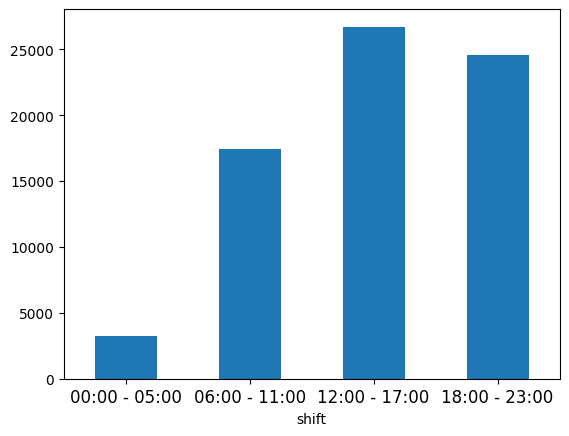

In [ ]:
cashier_shift = df.groupby('shift')['receipt_id'].count().reset_index()

cashier_shift.plot(kind='bar', x='shift', y='receipt_id', legend=False)
plt.xticks(rotation=0, fontsize=12)
plt.show()

### **7. Berikan Rekomendasi**
Kelompok Shift :
* 00.00 - 05.00
* 06.00 - 11.00
* 12.00 - 17.00
* 18.00 - 23.00

Jawaban:

> Berdasarkan hasil visualisasi barplot, shift jam 00:00 - 05:00 memiliki jumlah transaksi yang rendah. Oleh karena itu, efisiensi dapat dilakukan dengan mengurangi jumlah kasir atau pekerja pada shift ini, yang akan mengurangi biaya tenaga kerja tanpa mengganggu kualitas pelayanan.